# Primeira Versão do Sistema de Detecção de Sonolência

# 1. Instalando e importando as dependências e bibliotecas

AS CÉLULAS QUE APRESENTAM O SÍMBOLO "#" ESTÃO COMENTADAS POR CONTA DE QUE NÃO DEVEM SER EXECUTADAS PARA NÃO COMPROMETER O CARREGAMENTO DOS MODELOS!

#### CASO SEJA A PRIMEIRA VEZ QUE ESTE ALGORITMO ESTEJA SENDO EXECUTADO EM UMA NOVA MÁQUINA, RETIRE OS "#" DO COMEÇO DAS LINHAS QUE POSSUIREM COMANDOS DE INSTALAÇÃO E DE EXECUÇÃO REFERENTE À ALGUMA OU ALGUMAS FUNÇÕES E EXECUTE-AS. AS LINHAS QUE POSSUEM O "#" E QUE APRESENTAREM LITERALMENTE COMENTÁRIOS SOBRE O CÓDIGO, MANTENHA O "#" NESSAS LINHAS!

In [3]:
#!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu117


In [4]:
#!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [5]:
#!cd yolov5 & pip install -r requirements.txt

In [1]:
import torch #Biblioteca necessária para carregar o modelo YOLO e fazer detecções. Essa biblioteca também é importante para a parte de treinamento da rede neural presente neste modelo de detecção de objetos que foi carregado neste código, pois ela habilita a velocidade de processamento da GPU ou CPU da máquina que estiver sendo utilizada, para que as operações que são executadas ao longo do treinamento sejam feitas ainda mais rápidas. Caso use a CPU no lugar da GPU, o treinamento ocorrerá de maneira mais lenta.
from matplotlib import pyplot as plt #Biblioteca utilizada para visualizar e renderizar imagens referentes a detecções que foram feitas neste código.
import numpy as np #Biblioteca utilizada para realizar a transformação de arrays (dados/matrizes).
import cv2 #Biblioteca usada para disponibilizar a utilização e possibilitar que o algoritmo consiga acessar a webcam da máquina em que estiver rodando o código e ajuda também na renderização do feed (imagens capturadas em tempo real pelo equipamento) da webcam.

In [13]:
#!pip install -U ultralytics #Instalação do pacote "ultralytics" por conta de ser o pacote que contém as diferentes versões deste modelo de detecção de objetos pré-treinado (yolov5). Entre essas versões têm-se: "yolov5n"(nano), "yolov5s"(small), entre outras.

     -------------------------------------- 614.2/614.2 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.111
    Uninstalling ultralytics-8.0.111:
      Successfully uninstalled ultralytics-8.0.111


# 2. Carregando o modelo do software de detecção de objetos antes do treinamento da rede neural pré-treinada

In [2]:
# Carregando/baixando, do site "Pytorch hub", a versão "small" referente ao sistema de detecção de objetos Yolo versão 5. Essa versão está presente dentro do pacote "ultralytics".
# É nesse site que geralmente ficam armazenadas as diferentes versões deste modelo pré-treinado de detecção de objetos para essa versão 5.
# Primeiro, neste comando, é selecionado o pacote "ultralytics" que é onde se encontra o modelo que se quer usar neste script e, depois, é selecionado a versão do modelo cuja qual é a "small". Essa versão possui uma rede neural mais leve e rápida.
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\japat/.cache\torch\hub\master.zip
YOLOv5  2023-11-19 Python-3.9.13 torch-1.13.0+cu117 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8191MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [41]:
model # Está apresentado abaixo a arquitetura completa do modelo que foi baixado e carregado na célula anterior, mostrando cada uma das diferentes camadas presentes dentro deste modelo.

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Fazendo algumas detecções de objetos em imagens

In [3]:
img1 = 'https://thumbs.dreamstime.com/b/vista-a%C3%A9rea-dos-carros-no-tr%C3%A1fego-27980537.jpg' #Selecionou-se uma imagem do Google e foi usada a URL da mesma.

In [4]:
results1 = model(img1) #Passando a imagem, que foi atribuída a variável "img1" acima, por dentro do modelo de detecção de objetos que foi carregado anteriormente.
results1.print() #Printando o resultado abaixo. Nota-se que foram detectados 29 carros.

image 1/1: 534x800 29 cars
Speed: 479.1ms pre-process, 55.7ms inference, 116.9ms NMS per image at shape (1, 3, 448, 640)


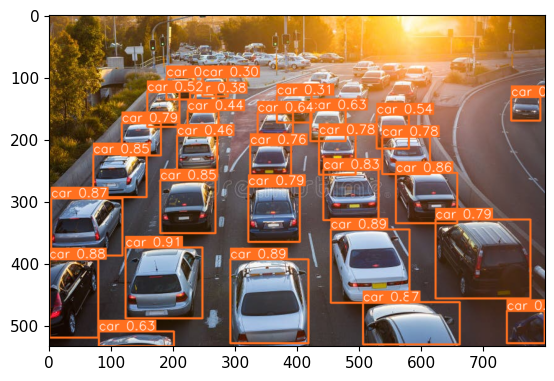

In [5]:
# Comandos para realizar a renderização da imagem que foi passada por dentro do modelo, mostrando as detecções que foram realizadas na própria imagem.
# A função "np.squeeze" foi utilizada para desencapsular os arrays da imagem para que fosse possível renderiza-la usando "matplotlib". Essa função, basicamente, comprime o encapsulamento e extrai apenas as informações necessárias sobre a imagem para, assim, poder renderiza-la.
# Depois, é usada a função "plt.imshow()" que já é uma função integrada na biblioteca "matplotlib" para simplesmente poder mostrar a imagem resultante como está abaixo.
%matplotlib inline
plt.imshow(np.squeeze(results1.render()))
plt.show()

In [47]:
results1.render() #O array abaixo apresenta todas as informações mostradas acima na imagem.

[array([[[208, 181, 162],
         [194, 165, 147],
         [176, 143, 124],
         ...,
         [110,  65,   8],
         [110,  65,  10],
         [110,  65,  10]],
 
        [[159, 129, 101],
         [183, 152, 124],
         [203, 167, 141],
         ...,
         [111,  66,   9],
         [111,  66,   9],
         [111,  66,   9]],
 
        [[123,  88,  50],
         [145, 107,  70],
         [165, 125,  89],
         ...,
         [114,  68,   9],
         [113,  68,  11],
         [113,  68,  11]],
 
        ...,
 
        [[ 24,  13,   9],
         [ 24,  13,   9],
         [ 24,  13,   9],
         ...,
         [179,  83,  37],
         [179,  84,  35],
         [185,  88,  40]],
 
        [[ 24,  13,   9],
         [ 24,  13,   9],
         [ 24,  13,   9],
         ...,
         [ 43,  30,  47],
         [ 46,  34,  46],
         [ 61,  50,  58]],
 
        [[ 25,  14,  10],
         [ 25,  14,  10],
         [ 25,  14,  10],
         ...,
         [ 43,  30,  47],
  

# 4. Detecções de objetos em tempo real (usando uma webcam) e em vídeos

In [7]:
cap = cv2.VideoCapture(0) # Essa linha, basicamente, está acessando qualquer dispositivo de captura de vídeo que esteja conectado no pc em que estiver rodando este script.
while cap.isOpened(): #Enquanto a webcam estiver sendo usada.
    ret, frame = cap.read() #Essa linha está percorrendo todo o feed da webcam, pegando cada um dos frames que estão sendo capturados pelo dispositivo. 
    
    results2 = model(frame) #Nessa linha, cada frame capturado está passando pelo modelo carregado e são mostradas as detecções feitas em tempo real.
    
    cv2.imshow('YOLO', np.squeeze(results2.render())) #Essa linha é usada para renderizar um pop-up em que serão mostrados os frames em tempo real que estão sendo capturados pela webcam junto com as detecções acontecendo em cima destes frames.
    
    if cv2.waitKey(10) & 0xFF == ord('q'): #Essa linha e as debaixo são voltadas para verificar se a tecla "q" do teclado foi clicada. Se sim, o pop-up de saída da webcam é fechado e a webcam é liberada. 
        break
cap.release()
cv2.destroyAllWindows()

# 5. Realizando um treinamento customizado para o sistema de detecção de obtejos pré-treinado que foi carregado anteriormente

### Nas 3 células abaixo está sendo realizado um processo de coleta de imagens do rosto do usuário que estiver executando este script a partir da utilização de uma webcam com o intuíto de realizar a criação de um novo dataset de treinamento do zero baseado no rosto do próprio usuário.

In [8]:
import uuid #Dependência importada para criar um identificador único, ou seja, essa dependência será utilizada para nomear (rotular) as fotos que serão tiradas do meu rosto.
import os #Dependência importada para alavancar/trabalhar com os files paths (caminhos dos arquivos), automatizando o processo de ter que salvar manualmente cada uma das fotos tiradas do rosto do usuário em uma nova pasta.
import time #Dependência importada para se fazer uma pequena pausa entre cada uma das fotos que estarão sendo coletadas do rosto do usuário.

In [ ]:
#IMAGES_PATH = os.path.join('data', 'images') #Criando um "caminho de imagens" para salvar nossas imagens/fotos capturadas em uma pasta chamada "images" que vai estar dentro de uma pasta chamada "data"./data/images. 
#labels = ['acordado', 'sonolento'] #As duas classses referentes as fotos que serão tiradas. "Acordado" e "sonolento".
#number_imgs = 20 #Número de fotos que se quer coletar para cada classe.

In [ ]:
#cap = cv2.VideoCapture(0) #Utilizando a webcam que já foi utilizada em um loop anterior.
#Loop percorrendo os rótulos
#for label in labels: #Este loop apenas percorrerá cada um dos rótulos criados e, em resumo, está primeira parte do loop está dividindo a coleta das 40 fotos entre os dois rótulos criados apresentando a mensagem no momento da coleta "Collecting images for[acordado][sonolento]".
#    print('Collecting images for {}'.format(label)) #Printa essa mensagem no momento de coleta de cada tipo de rótulo.
#    time.sleep(15) #Pausa de 15 sec. na transição da coleta das 20 fotos do rótulo "acordado" para o rótulo "sonolento".
    
    #Loop percorrendo todo o intervalo (quantidade) das fotos capturadas
#     for img_num in range(number_imgs): #Este loop irá passar por todas as fotos capturadas para cada um dos rótulos criados, numerando cada uma destas fotos.
#       print('Collecting images for {}, image number {}'.format(label, img_num)) #Printando para qual rótulo estão sendo coletadas as fotos e qual é o número da foto atual que está sendo capturada.
        
#Os prints apresentados nos loops acima foram criados para apresentar mensagens ao desenvolvedor, para que o mesmo fique ciente do momento em que for realizada a coleta de fotos para cada rótulo e o número de cada foto.
        
        #Lendo o feed da webcam
#        ret, frame = cap.read()
        
        #Nomeando o caminho da foto
#        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg') #Passando pelo caminho pelo qual as fotos terão de passar para serem salvas naquelas pastas criadas com os nomes "data" e "images", atribuindo o nome da primeira classe ("acordado") e criando um identificador específico para cada foto e este identificador serve para que as fotos não se sobreponham ou sobrescrevam entre elas. Está sendo considerado ".jpg" como formato de arquivo padrão para cada foto.
        
        #Gravando a foto no arquivo
#        cv2.imwrite(imgname, frame) #Passando pelo caminho completo do arquivo referente a foto que foi salva e gravando(salvando) a foto capturada pela webcam.
        
        #Renderizando na tela cada foto tirada
#        cv2.imshow('Image Collection', frame) 
#        time.sleep(3) #Tempo de pausa entre a captura de cada foto para dar tempo de se mover e tirar foto de ângulos diferentes (3 segundos).
        
        #Comandos já utilizados anteriormente no tópico 4 para encerrar o processo de captura, depois de já feito, e fechar todas as janelas.
#        if cv2.waitKey(10) & 0xFF == ord('q'):
#            break
#cap.release()
#cv2.destroyAllWindows()

In [ ]:
#!git clone https://github.com/heartexlabs/labelImg #Clonando o repositório da ferramenta "LabelImg" que está no Github.

As duas linhas de código abaixo dessa próxima célula são necessárias para o processo de instalação padrão da ferramenta LabelImg, instalando duas dependências necessárias e realizando o pré-processamento do arquivo "resources.qrc". A primeira dependência é a "pyqt5" que é uma biblioteca GUI (Interface Gráfica de Usuário) e "lxml" que é uma dependência da biblioteca "pyqt5". Essas linhas são necessárias, como já foi dito anteriormente, pois fazem parte da instalação padrão da ferramenta "LabelImg".

In [ ]:
#!pip install pyqt5 lxml --upgrade 
#!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc 

In [9]:
#!python labelImg\labelImg.py #Abrindo o LabelImg

Not find:/data/predefined_classes.txt (optional)
Cancel creation.


In [ ]:
#Esta célula é responsável por executar o treinamento da rede neural do modelo carregado anteriormente.
#!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2

O arquivo "dataset.yaml" na linha acima é responsável por uma parte da configuração para a execução deste treinamento customizado.

# 6.  Carregando e rodando o modelo resultante do treinamento customizado realizado no tópico anterior

In [9]:
# Carregando o modelo "custom" que é justamente o modelo que, passou pelo treinamento customizado e resultou no sistema de detecção de sonolência.
# Primeiro, neste comando, é selecionado o pacote "ultralytics" que é onde se encontra o modelo que se quer usar neste script e, depois, é selecionado a versão do modelo cuja qual é a "custom". Essa versão é referente ao modelo resultante do treinamento customizado.
model_custom = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp2/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\japat/.cache\torch\hub\master.zip
YOLOv5  2023-11-19 Python-3.9.13 torch-1.13.0+cu117 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8191MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


# 7. Testes de Detecção de Sonolência para imagens e em tempo real (via webcam)

### DETECÇÃO DE SONOLÊNCIA - TESTE COM UMA ÚNICA IMAGEM ENTRE AS IMAGENS QUE ESTÃO PRESENTES NO DATASET DE TREINAMENTO DA REDE NEURAL DESTE SISTEMA

### DETECÇÃO DE SONOLÊNCIA EM TEMPO REAL (Executar a célula abaixo)

In [38]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    results4 = model_custom(frame)
    
    cv2.imshow('YOLO', np.squeeze(results4.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

### DETECÇÃO DE SONOLÊNCIA - TESTE COM UMA ÚNICA IMAGEM PRESENTE NO DATASET DE TESTE, PASSANDO A MESMA ATRAVÉS DO MODELO

In [14]:
img3 = os.path.join('teste','Dataset_teste', 'Sonolento4.jpg')

In [15]:
results5 = model_custom(img3)

In [16]:
results5.print()

image 1/1: 2000x1354 (no detections)
Speed: 22.0ms pre-process, 249.3ms inference, 0.0ms NMS per image at shape (1, 3, 640, 448)


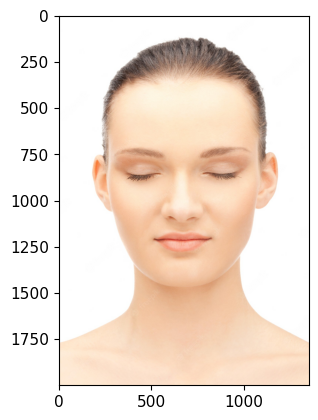

In [17]:
%matplotlib inline
plt.imshow(np.squeeze(results5.render()))
plt.show()

#### COMO É POSSÍVEL VER ACIMA, O MODELO NÃO FOI CAPAZ DE DETECCAR O ROSTO E NEM MESMO A CONDIÇÃO DE SONOLÊNCIA DA PESSOA

### DETECÇÃO DE SONOLÊNCIA - TESTE COM UMA ÚNICA IMAGEM PRESENTE NO DATASET DE TESTE, PASSANDO A MESMA ATRAVÉS DO MODELO

In [34]:
img8 = os.path.join('teste','Dataset_teste', 'Acordado6.jpg')

In [35]:
results10 = model_custom(img8)

In [36]:
results10.print()

image 1/1: 626x417 (no detections)
Speed: 176.2ms pre-process, 8.0ms inference, 0.0ms NMS per image at shape (1, 3, 640, 448)


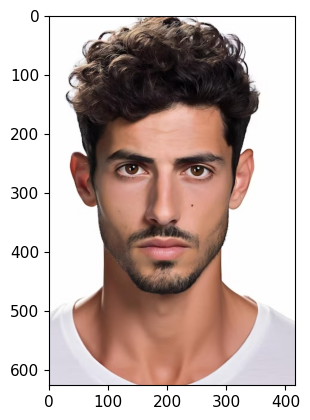

In [37]:
%matplotlib inline
plt.imshow(np.squeeze(results10.render()))
plt.show()

A IMAGEM ACIMA FOI RETIRADA DO GOOGLE E, PORTANTO, NÃO FAZ PARTE DO DATASET DE TREINAMENTO UTILIZADO.